In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import mpld3
import pandas as pd
import seaborn as sns
sns.set_context("talk")

See [figure 1.6](https://github.com/fdion/infographics_research/blob/master/Figure1.6.ipynb) notebook for more details. This data is from:


### World Population Prospects: The 2015 Revision

File FERT/4: Total fertility by major area, region and country, 1950-2100 (children per woman)

Estimates, 1950 - 2015                                
POP/DB/WPP/Rev.2015/FERT/F04                                
July 2015 - Copyright © 2015 by United Nations. All rights reserved                                
Suggested citation: United Nations, Department of Economic and Social Affairs, Population Division (2015). World Population Prospects: The 2015 Revision, DVD Edition.



In [2]:
df = pd.read_excel('../data/WPP2015_FERT_F04_TOTAL_FERTILITY.XLS', skiprows=16, index_col = 'Country code')
df = df[df.index < 900]  # codes 900+ are regions, not countries

In [3]:
df.rename(columns={df.columns[2]:'Description'}, inplace=True)

In [4]:
df.drop(df.columns[[0, 1, 3, 16]], axis=1, inplace=True) # drop what we dont need

In [5]:
df.sort_values(by='2005-2010', ascending=True, inplace=True)

In [6]:
df.head()

,Description,1950-1955,1955-1960,1960-1965,1965-1970,1970-1975,1975-1980,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010
Country code,,,,,,,,,,,,,
446,"China, Macao SAR",4.3858,5.1088,4.4077,2.7367,1.7930,1.4079,1.9769,1.9411,1.4050,1.1160,0.8252,0.9379
344,"China, Hong Kong SAR",4.4400,4.7200,5.3100,3.6450,3.2900,2.3100,1.7150,1.3550,1.2400,0.8700,0.9585,1.0257
410,Republic of Korea,5.0500,6.3320,5.6300,4.7080,4.2810,2.9190,2.2340,1.6010,1.6960,1.5140,1.2190,1.2284
702,Singapore,6.6100,6.3350,5.1200,3.6450,2.8150,1.8400,1.6940,1.6973,1.7307,1.5705,1.3480,1.2571
158,Other non-specified areas,5.9029,6.0602,5.2875,4.4125,3.3825,2.6400,2.1975,1.8450,1.7925,1.7275,1.4300,1.2614


In [7]:
X = df.drop(df.columns[0], axis=1)

# Hybrid Visual exploration of clusters

In [8]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [9]:
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope

In [10]:
tsne = TSNE(2, random_state=1)

In [11]:
data_2d = tsne.fit_transform(X)  
x = data_2d[:,0]
y = data_2d[:,1]

In [12]:
colors = [i for i,d in enumerate(df['Description'])]
fig, ax = plt.subplots()
scatter = ax.scatter(x,y,c=colors,cmap='viridis')
tooltip = mpld3.plugins.PointHTMLTooltip(scatter, labels=[str(i) for i in df.Description])
mpld3.plugins.connect(fig, tooltip)
mpld3.display()

Looks like Denmark, Congo, Vanuatu, Kuwait, Saint Lucia, Belgium, Cambodia and Bangladesh, to name a few, have a lower affinity.

# Selection by a human

In "The Functional Art: An introduction to information graphics and visualization" by Alberto Cairo, on page 12 we are presented with a visualization of the same UN data time series of Fertility rate (average number of children per woman) per country:

Figure 1.6 Highlighting the relevant, keeping the secondary in the background.


Cairo chose the following countries to highlight

In [13]:
highlight_countries = [
    'Niger', 'Yemen', 'India', 'Brazil', 'Norway', 'France', 'Sweden',
    'United Kingdom', 'Spain', 'Italy', 'Germany', 'Japan', 'China'
]

The following code approximates figure 16

In [14]:
def figure_16(df, highlight_countries):
    # Subset only countries to highlight, transpose for timeseries
    df_high = df[df.Description.isin(highlight_countries)].T[1:]

    # Subset the rest of the countries, transpose for timeseries
    df_bg = df[~df.Description.isin(highlight_countries)].T[1:]

    # background
    ax = df_bg.plot(legend=False, color='k', alpha=0.04, figsize=(14,10))
    ax.xaxis.tick_top()

    # highlighted countries
    df_high.plot(legend=False, ax=ax)

    # replacement level line
    ax.hlines(y=2.1, xmin=0, xmax=12, color='k', alpha=1, linestyle='dashed')

    # Average over time for all countries
    world_avg = df.mean()
    world_avg.plot(ax=ax, color='k')
    ax.text(11.2,world_avg[-1]+0.1,'World average')

    # labels for highlighted countries on the right side
    for i, country in enumerate(highlight_countries):
        ax.text(11.2,df[df.Description==country].values[0][12],country, alpha=0.5)

    # start y axis at 1
    ax.set_ylim(ymin=0.5)
    return ax

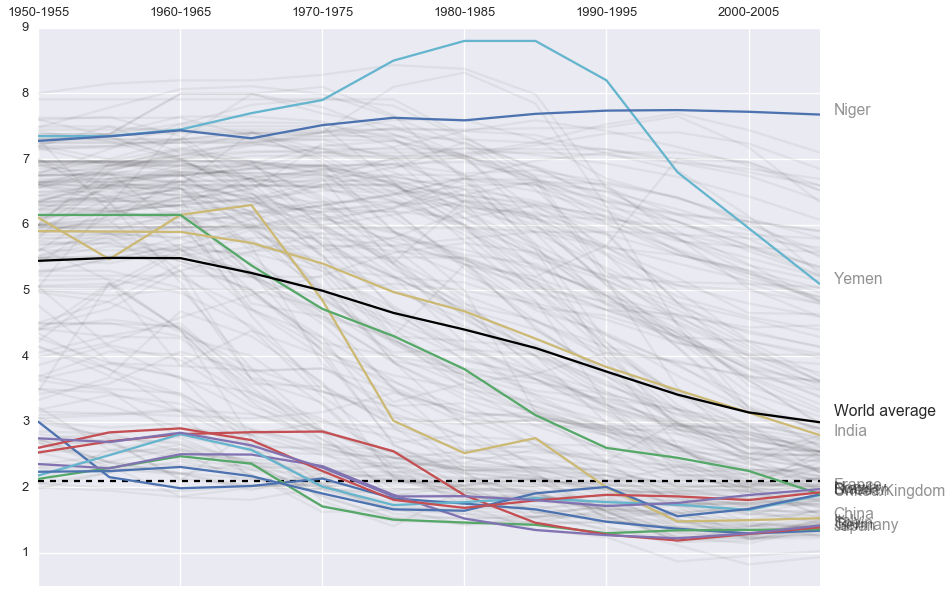

In [15]:
figure_16(df, highlight_countries);

# Selection by Isolation Forest

In [16]:
clf = IsolationForest(contamination=0.03,random_state=1234)

In [17]:
clf.fit(X)

IsolationForest(bootstrap=False, contamination=0.03, max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=1, random_state=1234,
        verbose=0)

In [18]:
pred = clf.predict(X)

In [19]:
highlight_countries = list(df[pred==-1].Description)

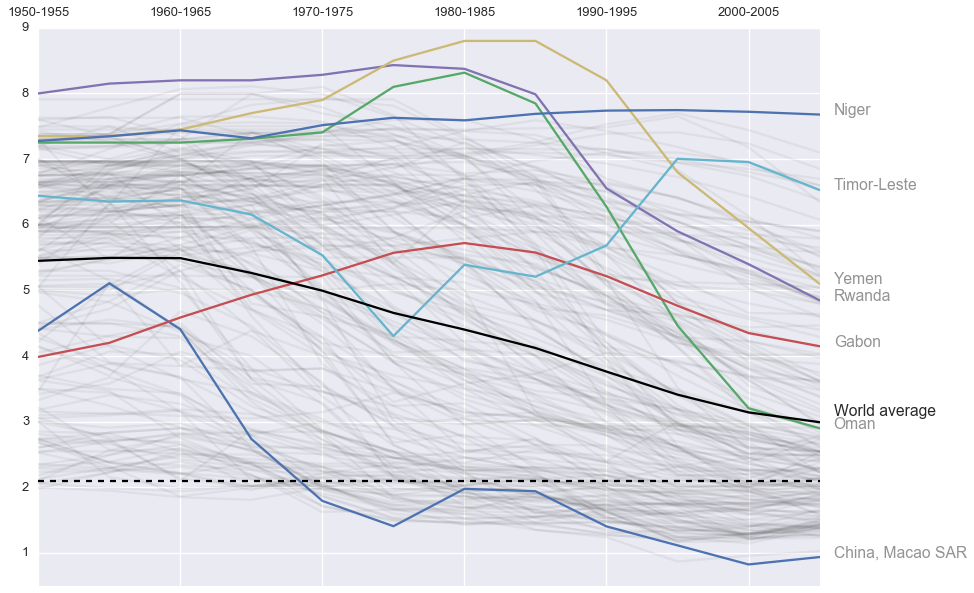

In [20]:
figure_16(df, highlight_countries);